In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 14_12_2022 07_32_53.xlsx'

In [3]:
'''if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')'''

"if not os.path.exists(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):\n    os.makedirs(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')"

In [4]:
#dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 21_11_2022 07_32_59.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtro = dados[['Competencia Evolucao','Houve internacao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]

In [9]:
base = filtro.groupby('Competencia Evolucao').count()
base = base.drop(columns=['Houve internacao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
base

""
Competencia Evolucao
2020_01
2020_02
2020_03
2020_04
2020_05
2020_06
2020_07
2020_08
2020_09


In [10]:
filtrado = dados[['Competencia Evolucao','Houve internacao','Classificacao final','Evolucao']]
filtrado = filtrado.dropna()
filtrado.head()

,Competencia Evolucao,Houve internacao,Classificacao final,Evolucao
4,2021_05,Não,COVID-19,Óbito
5,2021_03,Sim,SRAG não especificado,Cura
6,2022_02,Não,COVID-19,Óbito
7,2021_03,Não,COVID-19,Óbito
8,2021_03,Não,COVID-19,Óbito


In [11]:
numeradorCovid = filtrado.loc[filtrado['Evolucao']=='Óbito']
numeradorCovid = numeradorCovid.loc[numeradorCovid['Classificacao final']=='COVID-19']
numeradorCovid = numeradorCovid.loc[numeradorCovid['Houve internacao']=='Sim']
numeradorCovid = numeradorCovid.groupby('Competencia Evolucao').count()
numeradorCovid.head()

,Houve internacao,Classificacao final,Evolucao
Competencia Evolucao,,,
2020_03,4,4,4
2020_04,58,58,58
2020_05,174,174,174
2020_06,420,420,420
2020_07,1321,1321,1321


In [12]:
denominadorCovid = filtrado
denominadorCovid['Evolucao'] = denominadorCovid['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'}) #Vai substituir onde esta Óbito ou Cura por Óbito/Cura, para dps podermos pegar so as linhas que interessam
denominadorCovid = denominadorCovid.loc[denominadorCovid['Evolucao']=='Óbito/Cura']
denominadorCovid = denominadorCovid.loc[denominadorCovid['Houve internacao']=='Sim']
denominadorCovid = denominadorCovid.loc[denominadorCovid['Classificacao final']=='COVID-19']
denominadorCovid = denominadorCovid.groupby('Competencia Evolucao').count()
denominadorCovid.head()

,Houve internacao,Classificacao final,Evolucao
Competencia Evolucao,,,
2020_03,37,37,37
2020_04,418,418,418
2020_05,975,975,975
2020_06,1684,1684,1684
2020_07,4025,4025,4025


In [13]:
calculoCovid = numeradorCovid['Evolucao']/denominadorCovid['Evolucao']*100
calculoCovid = calculoCovid.to_frame()
calculoCovid = calculoCovid.reset_index()
calculoCovid.head()

,Competencia Evolucao,Evolucao
0,2020_03,10.810811
1,2020_04,13.875598
2,2020_05,17.846154
3,2020_06,24.940618
4,2020_07,32.819876


In [14]:
semana = calculoCovid['Competencia Evolucao']
semana

0     2020_03
1     2020_04
2     2020_05
3     2020_06
4     2020_07
5     2020_08
6     2020_09
7     2020_10
8     2020_11
9     2020_12
10    2021_01
11    2021_02
12    2021_03
13    2021_04
14    2021_05
15    2021_06
16    2021_07
17    2021_08
18    2021_09
19    2021_10
20    2021_11
21    2021_12
22    2022_01
23    2022_02
24    2022_03
25    2022_04
26    2022_05
27    2022_06
28    2022_07
29    2022_08
30    2022_09
31    2022_10
32    2022_11
Name: Competencia Evolucao, dtype: object

In [15]:
eixo_y_Covid = calculoCovid['Evolucao']

## Inicio Influenza e VSR

In [16]:
numeradorInflu = filtro.loc[filtro['Evolucao']=='Óbito']
numeradorInflu = numeradorInflu.loc[numeradorInflu['Houve internacao']=='Sim']
numeradorInflu = numeradorInflu.loc[numeradorInflu['pos_pcrflu']=='Sim']
numeradorInflu = numeradorInflu.groupby('Competencia Evolucao').count()
numeradorInflu = numeradorInflu.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
numeradorInflu

,Evolucao,pos_pcrflu
Competencia Evolucao,,
2020_01,1,1
2020_03,1,1
2021_03,1,1
2021_12,3,3
2022_01,30,30
2022_02,12,12
2022_03,4,4
2022_04,2,2
2022_05,15,15


In [17]:
numeradorVSR = filtro.loc[filtro['Evolucao']=='Óbito']
numeradorVSR = numeradorVSR.loc[numeradorVSR['Houve internacao']=='Sim']
numeradorVSR = numeradorVSR.loc[numeradorVSR['pcr_vsr']==1]
numeradorVSR = numeradorVSR.groupby('Competencia Evolucao').count()
numeradorVSR = numeradorVSR.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pos_pcrflu'])
numeradorVSR

,Evolucao,pcr_vsr
Competencia Evolucao,,
2020_05,1,1
2021_04,8,8
2021_05,4,4
2021_06,4,4
2021_07,6,6
2021_08,12,12
2021_09,6,6
2021_10,5,5
2021_11,2,2


In [18]:
numeradorInfluVSR = pd.concat([numeradorInflu,numeradorVSR])
numeradorInfluVSR = numeradorInfluVSR.fillna(0)
numeradorInfluVSR = numeradorInfluVSR.reset_index()
numeradorInfluVSR = numeradorInfluVSR.sort_values(by='Competencia Evolucao')
numeradorInfluVSR = numeradorInfluVSR.groupby('Competencia Evolucao').sum()
numeradorInfluVSR['Calculo'] = numeradorInfluVSR['pos_pcrflu'] + numeradorInfluVSR['pcr_vsr']
numeradorInfluVSR

,Evolucao,pos_pcrflu,pcr_vsr,Calculo
Competencia Evolucao,,,,
2020_01,1,1.0,0.0,1.0
2020_03,1,1.0,0.0,1.0
2020_05,1,0.0,1.0,1.0
2021_03,1,1.0,0.0,1.0
2021_04,8,0.0,8.0,8.0
2021_05,4,0.0,4.0,4.0
2021_06,4,0.0,4.0,4.0
2021_07,6,0.0,6.0,6.0
2021_08,12,0.0,12.0,12.0


In [19]:
denominadorInflu = filtro.copy()
denominadorInflu['Evolucao'] = denominadorInflu['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorInflu = denominadorInflu.loc[denominadorInflu['Evolucao']=='Óbito/Cura']
denominadorInflu = denominadorInflu.loc[denominadorInflu['Houve internacao']=='Sim']
denominadorInflu = denominadorInflu.loc[denominadorInflu['pos_pcrflu']=='Sim']
denominadorInflu = denominadorInflu.groupby('Competencia Evolucao').count()
denominadorInflu = denominadorInflu.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
denominadorInflu

,Evolucao,pos_pcrflu
Competencia Evolucao,,
2020_01,4,4
2020_02,4,4
2020_03,3,3
2020_04,1,1
2020_05,1,1
2020_07,1,1
2020_10,1,1
2021_02,1,1
2021_03,1,1


In [20]:
denominadorVSR = filtro.copy()
denominadorVSR['Evolucao'] = denominadorVSR['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorVSR = denominadorVSR.loc[denominadorVSR['Evolucao']=='Óbito/Cura']
denominadorVSR = denominadorVSR.loc[denominadorVSR['Houve internacao']=='Sim']
denominadorVSR = denominadorVSR.loc[denominadorVSR['pcr_vsr']==1]
denominadorVSR = denominadorVSR.groupby('Competencia Evolucao').count()
denominadorVSR = denominadorVSR.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pos_pcrflu'])
denominadorVSR

,Evolucao,pcr_vsr
Competencia Evolucao,,
2020_04,2,2
2020_05,1,1
2020_06,1,1
2020_07,1,1
2021_01,3,3
2021_02,6,6
2021_03,34,34
2021_04,90,90
2021_05,178,178


In [21]:
denominadorInfluVSR = pd.concat([denominadorInflu,denominadorVSR])
denominadorInfluVSR = denominadorInfluVSR.fillna(0)
denominadorInfluVSR = denominadorInfluVSR.reset_index()
denominadorInfluVSR = denominadorInfluVSR.sort_values(by='Competencia Evolucao')
denominadorInfluVSR = denominadorInfluVSR.groupby('Competencia Evolucao').sum()
denominadorInfluVSR['Calculo'] = denominadorInfluVSR['pos_pcrflu'] + denominadorInfluVSR['pcr_vsr']
denominadorInfluVSR

,Evolucao,pos_pcrflu,pcr_vsr,Calculo
Competencia Evolucao,,,,
2020_01,4,4.0,0.0,4.0
2020_02,4,4.0,0.0,4.0
2020_03,3,3.0,0.0,3.0
2020_04,3,1.0,2.0,3.0
2020_05,2,1.0,1.0,2.0
2020_06,1,0.0,1.0,1.0
2020_07,2,1.0,1.0,2.0
2020_10,1,1.0,0.0,1.0
2021_01,3,0.0,3.0,3.0


In [22]:
calculoInfluVSR = numeradorInfluVSR['Calculo']/denominadorInfluVSR['Calculo']*100
calculoInfluVSR = calculoInfluVSR.to_frame()
calculoInfluVSR = calculoInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
calculoInfluVSR = calculoInfluVSR.drop(['2020_01','2020_02'])
calculoInfluVSR = calculoInfluVSR.reset_index()
calculoInfluVSR = calculoInfluVSR.fillna(0)
calculoInfluVSR.head(30)

,Competencia Evolucao,Calculo
0,2020_03,33.333333
1,2020_04,0.000000
2,2020_05,50.000000
3,2020_06,0.000000
4,2020_07,0.000000
5,2020_08,0.000000
6,2020_09,0.000000
7,2020_10,0.000000
8,2020_11,0.000000
9,2020_12,0.000000


In [23]:
eixo_y_InfluVSR = calculoInfluVSR['Calculo']

In [24]:
legenda = pd.DataFrame(columns=['COVID-19','Influenza e VSR'])

In [25]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 13_12_2022'

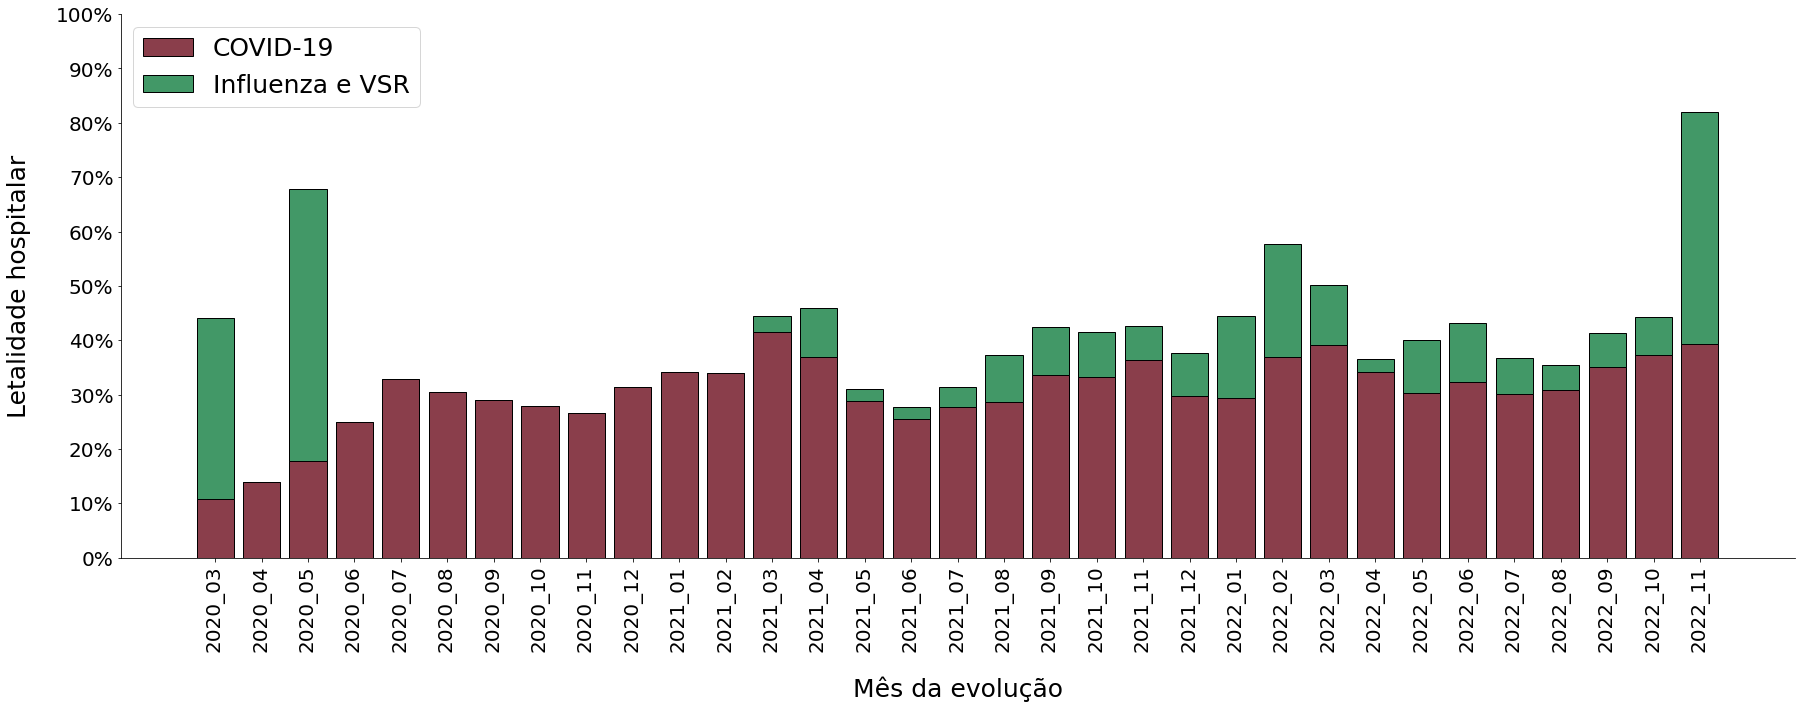

In [26]:
plt.figure(figsize=(30,10))
plt.bar(semana,eixo_y_Covid,color='#8a3e4b',edgecolor='#000000')
plt.bar(semana,eixo_y_InfluVSR,bottom=eixo_y_Covid,color='#429867',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,110,10),fontsize=20)
plt.xlabel('Mês da evolução',fontsize=25,labelpad=25)
plt.ylabel('Letalidade hospitalar',fontsize=25,labelpad=25)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,fontsize=25,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/letalidadeHosp_CovidInfluVSR.png',dpi=720,bbox_inches='tight')